***Provide a complete research report using the framework introduced in the previous module.***

The report should tell the story to your intended audience

should include compelling visualizations and actionable insights.

Walk through the analysis using clean, reproducible code.

*Include plenty of notes and comments to guide others through your thinking.*

***1. Introduction-***

To see if avocados have changed in price in the last five years.  There is a theory that avocados are recession proof.  Testing to see if thats all avocados or by type and region. The data set has great information particularly the AVGPRICE, YEAR, TYPE, and GEOGRAPHY.  Data contains more information but with these categories we can research if prices have been going up or down in the past five years.

(listed but not described is Price Look-Up (PLU) codes: 4046 refers to Small Hass avocados from Mexico, 4225 to Large Hass avocados from Mexico, and 4770 to Extra Large Hass avocados from Mexico. There are different PLUs for avocados grown in CA.)

***2. Hypothesis-***

Ho = avocados maintian their price over the last 5 years 

Ha = avocados change in price drastically in the past 5 years 


***3. Data-***

the information technically comes from  Hass Avocado Board (or HAB, for short) data and I found a link to the data: https://www.kaggle.com/timmate/avocado-prices-2020

on kaggle got the CSV file

made a sharable file as well:
did not alter just a straight upload 
(https://docs.google.com/spreadsheets/d/10PC09l53JLYd1xe9Iwqgpci30o5kbUaUCa3lDfBGcoA/edit?usp=sharing)

30,021 observations and 13 variables. There are no missing values 

In [ ]:
#Set Up for the report 

import math
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#google colab provided code to import
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving avocado-updated-2020.csv to avocado-updated-2020.csv
User uploaded file "avocado-updated-2020.csv" with length 3205357 bytes


In [ ]:
#import

a_df = pd.read_csv('avocado-updated-2020.csv')


In [ ]:
# Convert column headers to lowercase for ease of coding

a_df.columns = a_df.columns.str.lower()

print(a_df.shape)

a_df.info()
a_df.head()
#no nulls

(30021, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30021 entries, 0 to 30020
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30021 non-null  object 
 1   average_price  30021 non-null  float64
 2   total_volume   30021 non-null  float64
 3   4046           30021 non-null  float64
 4   4225           30021 non-null  float64
 5   4770           30021 non-null  float64
 6   total_bags     30021 non-null  float64
 7   small_bags     30021 non-null  float64
 8   large_bags     30021 non-null  float64
 9   xlarge_bags    30021 non-null  float64
 10  type           30021 non-null  object 
 11  year           30021 non-null  int64  
 12  geography      30021 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 3.0+ MB


,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


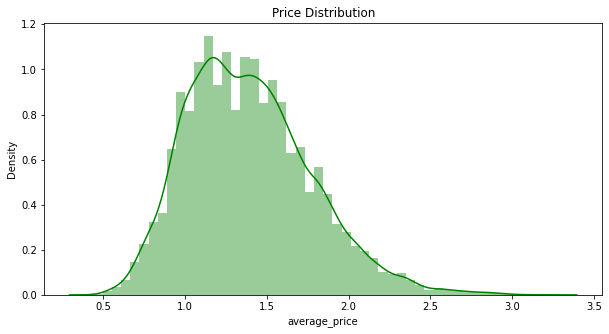

In [ ]:
# using graph to see changes in average price

plt.figure(figsize=(10,5))
plt.title("Price Distribution")
ax = sns.distplot(a_df["average_price"], color = 'g')

We see there has been changes to the average price of avocados

*4. Methods-*

Will split conventional avocados with organic avocados by type.  Then look at avg price with each type.  Reason for this break down is to see what factors contribute to the avg price.  Such as geography, year, and type such as orgainc or conventional avocados.

If the distributions of avg price appear to be close to normally distributed based on their histogram, skewness and kurtosis, need to conduct an independent samples t-test between the groups at the two-tail, 95% confidence interval.

In [ ]:
#the split

c_df = a_df[(a_df['type'] == 'conventional')]
o_df = a_df[(a_df['type'] == 'organic')]

print(c_df.info())
print(o_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15012 entries, 0 to 30019
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15012 non-null  object 
 1   average_price  15012 non-null  float64
 2   total_volume   15012 non-null  float64
 3   4046           15012 non-null  float64
 4   4225           15012 non-null  float64
 5   4770           15012 non-null  float64
 6   total_bags     15012 non-null  float64
 7   small_bags     15012 non-null  float64
 8   large_bags     15012 non-null  float64
 9   xlarge_bags    15012 non-null  float64
 10  type           15012 non-null  object 
 11  year           15012 non-null  int64  
 12  geography      15012 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15009 entries, 1 to 30020
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------

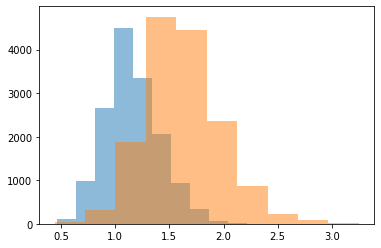

DescribeResult(nobs=15012, minmax=(0.46, 2.22), mean=1.1579203304023449, variance=0.06245164697323038, skewness=0.42860917086760725, kurtosis=0.1964271372561841)
DescribeResult(nobs=15009, minmax=(0.44, 3.25), mean=1.6239856086348192, variance=0.11979858614681937, skewness=0.4972402508318576, kurtosis=0.7371834776636561)


In [ ]:
plt.hist(c_df['average_price'], alpha = .5)
plt.hist(o_df['average_price'], alpha = .5)
plt.show()

print(stats.describe(c_df['average_price']))
print(stats.describe(o_df['average_price']))

In [ ]:
#used Shapiro-Wilk test. 
#The null hypothesis is that the population is normally distributed.
#the P value is over 0.05

print(stats.shapiro(c_df['average_price']))
print(stats.shapiro(o_df['average_price']))

(0.9888799786567688, 2.058767271249084e-32)
(0.9856230020523071, 4.239346046885877e-36)


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
#W is over 1. 

In [ ]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(c_df['average_price'], o_df['average_price']))

# checking the means of 'average price' of conventional and organic avocados 

print(c_df["average_price"].mean())
print(o_df["average_price"].mean())

The difference in means at the 95% confidence interval (two-tail) is between 0.45923561375945315 and 0.47289494270547733.
1.1579203304023482
1.6239856086348134


In [ ]:
#the mean price of conventional avocados is around 1.15
#where as the mean for organic is higher.

In [ ]:
#Checking how much Organic and Conventional prices differ

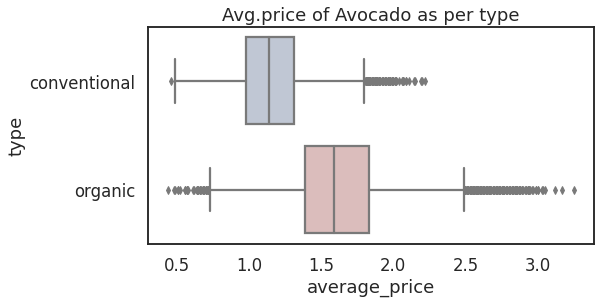

In [ ]:
plt.figure(figsize=(8,4))
sns.set(style="white", context="talk")
plt.title("Avg.price of Avocado as per type")
sns.boxplot(x="average_price",y="type",data= a_df,palette="vlag")

organic is showing more changes

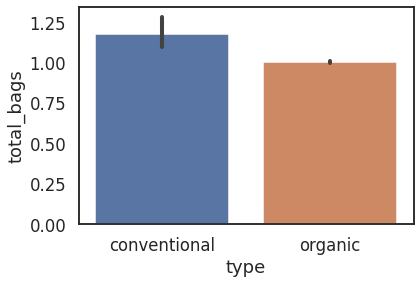

In [ ]:
sns.barplot(x=a_df['type'],y=a_df['total_bags'].value_counts())

In [ ]:
#checking which type sells more 
#and conventional sells alot more bags one reason it keeps a steady avg price

makes more sense to work with cities rather then states. Going to remove states from the geography column.

In [ ]:
regionsToRemove = ['California', 'Great Lakes', 'Midsouth', 'New York', 'Northeast', 'South Carolina', 'Plains', 'South Central', 'Southeast', 'Total U.S.', 'West Tex/New Mexico', 'West']
df = a_df[~a_df.geography.isin(regionsToRemove)]
len(a_df.geography.unique())

54

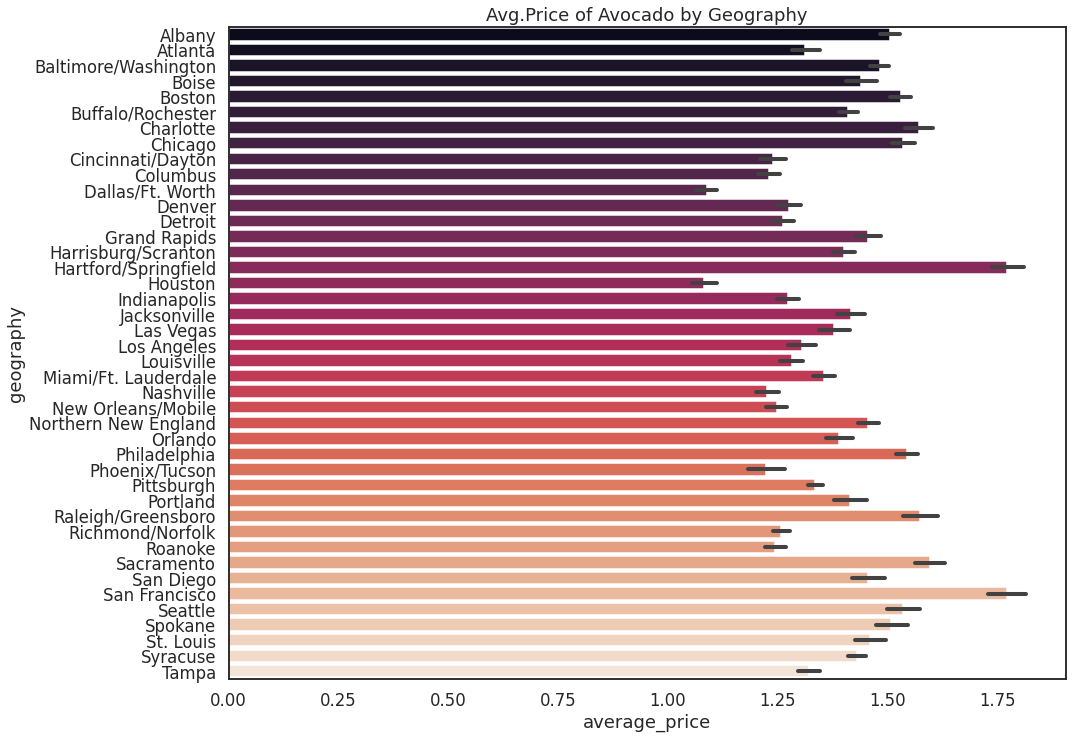

In [ ]:
plt.figure(figsize=(15,12))
sns.set(style="white", context="talk")
plt.title("Avg.Price of Avocado by Geography")
sns.barplot(x="average_price",y="geography",data= df,palette="rocket")

In [ ]:
#avg price of avocado varies the most in the east coast area San Francisco and Harthford/Springfield

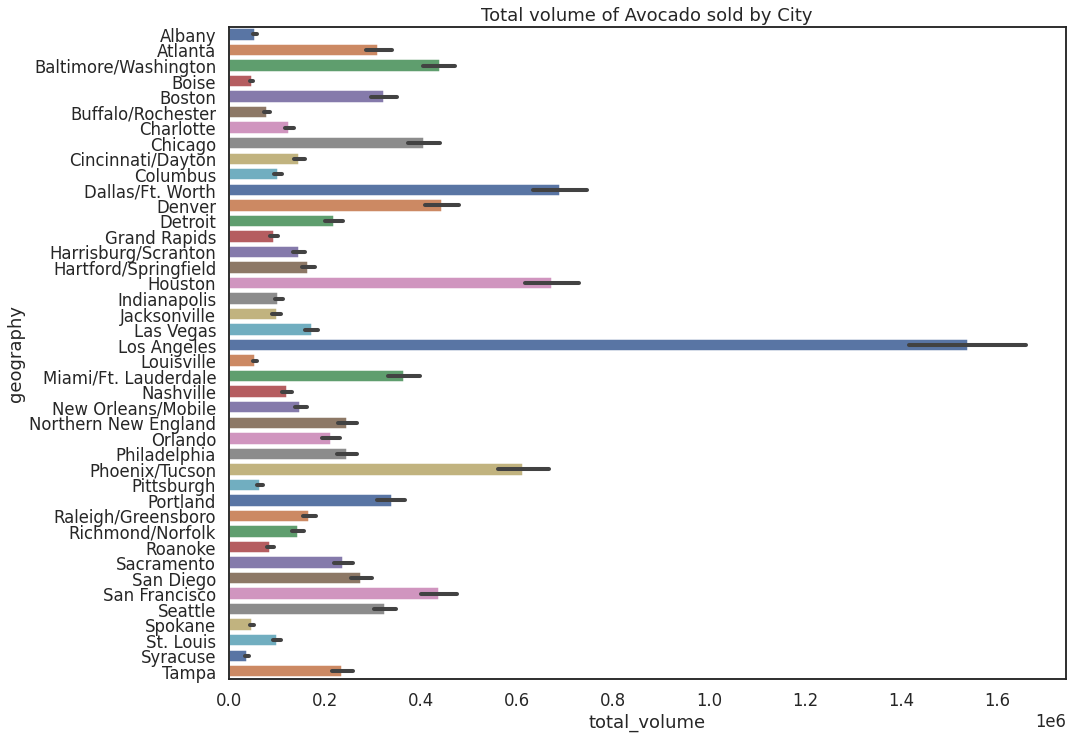

In [ ]:
plt.figure(figsize=(15,12))
sns.set(style="white", context="talk")
plt.title("Total volume of Avocado sold by City")
sns.barplot(x="total_volume",y="geography",data= df,palette="deep")

#using diagram to see which city buys the most avocados 

Los Angles seems like the most volume keeping that avg price steady. Data that can go along with the Ho that the avg keeps steady over time 

Text(0.5, 1.0, 'Avg Price of avocado as per type on avocado over time')

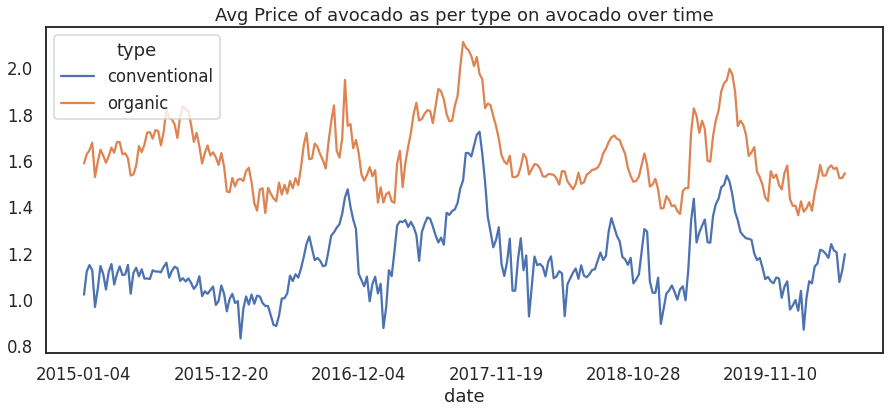

In [ ]:
#the total volume of avocados sold over time per type

fig,ax = plt.subplots(figsize=(15,6))
df.groupby(['date','type']).mean()['average_price'].unstack().plot(ax=ax)
plt.title('Avg Price of avocado as per type on avocado over time')

The avg price of avocados over time. Does support the Ha: that avocados prices change over time.  Organic more than conventional so it does depend by type and area. 

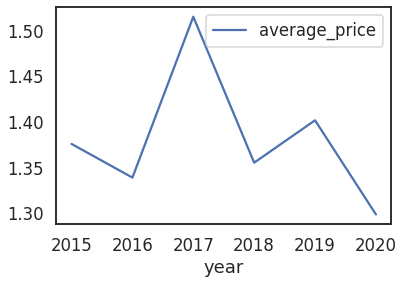

In [ ]:
m = a_df[["year", "average_price"]].groupby("year").mean()

m.plot();

***5. Results-***

With the tests ran on avocado prices we can see that conventional avocados keep a steady price.  Being somewhat recession proof where as organic avocados their avg price change more over time.  States near Mexico have a better chance of maintaining their avgerage price as well.  Ho: is correct with conventional avocados 

***6. Discussion-***

Can see that prices do change over time for avocados.  Organic more than conventional so it depends which type of avocado you wish to purchase.  You have a better chance of getting a better price in a state near the west coast area and Mexico